# <font color='blue'>**LABORATORIO 1. Comparación de clasificadores clásico y modernos**

<font color='red'>Integrantes: 
    
    Coloque los nombres completos con #ID UAO aqui (máximo 2 personas)



Adicione el código que sea necesario. No olvide comentarlo.

### Exploring and getting data for ANN

In [1]:
#coloque aqui todas las librerías que usará para desarrolar este laboratorio.
import numpy as np
from matplotlib  import pyplot as plt 
import cv2 as cv
from google.colab.patches import cv2_imshow
#from keras.datasets import mnist
#from keras.models import Sequential
#from keras.layers.core import Dense
import random
import os
from tensorflow import keras
import tensorflow.keras.layers as LK

import tensorflow.keras.models as MK

In [2]:
#4 paso
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [5]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
!kaggle datasets download die9origephit/nike-adidas-and-converse-imaged

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
%cd /content/drive/MyDrive/Colab Notebooks/computerVision/
!mkdir BagVisualWords_classCNN
%cd BagVisualWords_classCNN
!mkdir Cv2DL_2022_clase4
%cd Cv2DL_2022_clase4/
!pwd

/content/drive/MyDrive/Colab Notebooks/computerVision
mkdir: cannot create directory ‘BagVisualWords_classCNN’: File exists
/content/drive/MyDrive/Colab Notebooks/computerVision/BagVisualWords_classCNN
mkdir: cannot create directory ‘Cv2DL_2022_clase4’: File exists
/content/drive/MyDrive/Colab Notebooks/computerVision/BagVisualWords_classCNN/Cv2DL_2022_clase4
/content/drive/MyDrive/Colab Notebooks/computerVision/BagVisualWords_classCNN/Cv2DL_2022_clase4


In [9]:
!mv /content/nike-adidas-and-converse-imaged.zip ./

mv: cannot stat '/content/nike-adidas-and-converse-imaged.zip': No such file or directory


In [10]:
!unzip /content/drive/MyDrive/CvwDL_2022_3/clase3/nike-adidas-and-converse-imaged.zip

unzip:  cannot find or open /content/drive/MyDrive/CvwDL_2022_3/clase3/nike-adidas-and-converse-imaged.zip, /content/drive/MyDrive/CvwDL_2022_3/clase3/nike-adidas-and-converse-imaged.zip.zip or /content/drive/MyDrive/CvwDL_2022_3/clase3/nike-adidas-and-converse-imaged.zip.ZIP.


In [11]:
!ls

confusion_MLP.png  nike-adidas-and-converse-imaged.zip	test  train


In [12]:
!unzip nike-adidas-and-converse-imaged.zip -y

Archive:  nike-adidas-and-converse-imaged.zip
caution: filename not matched:  -y


In [13]:
# Se recorre el directorio train
#dirname da la ruta de las carpetas train inicialmente luego:
#train/adidas
#train/converse
#train/nike
#filenames es un vector por ende en el segundo for
#lo que se junta es la ruta con el nombre del archivo.
#la sentencia break hace que leamos un único archivo en esa ruta
for dirname, _, filenames in os.walk('train'):  
  for filename in filenames:    
    print(os.path.join(dirname, filename))
    break
    


train/adidas/168.jpg
train/converse/64.jpg
train/nike/129.jpg


In [14]:
#Permite listar el directorio del directorio dado esto permite obtener
#las etiquetas, siempre cuando las imágenes estén guardadas en sus
#respectivos folders
etiquetas = os.listdir('train')
print(etiquetas)


['adidas', 'converse', 'nike']


In [15]:
#Permite tener un loader al cargar imágenes
from tqdm.auto import tqdm

In [16]:
def load_resources(folder):
  images = []
  labels=[]
  for categoria in etiquetas:
    print("leyendo categoria", categoria)
    #se asigna un indice a la categoría, el cual servirá como una de las clases del vector target
    class_num = etiquetas.index(categoria)
    #folder será train o test
    ruta = os.path.join(folder,categoria)
    for img in tqdm(os.listdir(ruta)):
      # Se itera sobre la ruta Ej. train/adidas - y dentro de este folder habrá varias imágenes lo que haremos será leerlas y reedimensionarlas
      img_array = cv.imread(os.path.join(ruta, img), cv.IMREAD_GRAYSCALE)
      new_array = cv.resize(img_array,(400,400))
      # Se lee la imágen de la respectiva ruta, y como anteriormente se está iterando en
      #categoría, ingres la clase al vector de labels (target), y la imágen al array de imágenes
      #Se encuentran en el mismo orden por ende la clase corresponderá a la imágen Ej. Imagen de adidas - Corresponde a la clase adidas (class 0)
      images.append(new_array)
      labels.append(class_num)
  return np.array(images) , np.array(labels)


In [17]:
def load_resources_RGB(folder):
  images = []
  labels=[]
  for categoria in etiquetas:
    print("leyendo categoria", categoria)
    #se asigna un indice a la categoría, el cual servirá como una de las clases del vector target
    class_num = etiquetas.index(categoria)
    #folder será train o test
    ruta = os.path.join(folder,categoria)
    for img in tqdm(os.listdir(ruta)):
      # Se itera sobre la ruta Ej. train/adidas - y dentro de este folder habrá varias imágenes lo que haremos será leerlas y reedimensionarlas
      img_array = cv.imread(os.path.join(ruta, img), cv.COLOR_BGR2RGB)
      new_array = cv.resize(img_array,(400,400))
      # Se lee la imágen de la respectiva ruta, y como anteriormente se está iterando en
      #categoría, ingres la clase al vector de labels (target), y la imágen al array de imágenes
      #Se encuentran en el mismo orden por ende la clase corresponderá a la imágen Ej. Imagen de adidas - Corresponde a la clase adidas (class 0)
      images.append(new_array)
      labels.append(class_num)
  return np.array(images) , np.array(labels)

In [18]:
etiquetas = os.listdir('train')
print(etiquetas)

['adidas', 'converse', 'nike']


In [19]:
x_train, y_train = load_resources('train')



leyendo categoria adidas


  0%|          | 0/237 [00:00<?, ?it/s]

leyendo categoria converse


  0%|          | 0/237 [00:00<?, ?it/s]

leyendo categoria nike


  0%|          | 0/237 [00:00<?, ?it/s]

In [20]:
x_test, y_test= load_resources('test')


leyendo categoria adidas


  0%|          | 0/38 [00:00<?, ?it/s]

leyendo categoria converse


  0%|          | 0/38 [00:00<?, ?it/s]

leyendo categoria nike


  0%|          | 0/38 [00:00<?, ?it/s]

In [21]:
x_test.shape

(114, 400, 400)

In [22]:
y_test.shape

(114,)

In [23]:
print("La dimensión de los datos para entrenamiento es: ", x_train.shape)
print("La dimensión de las etiquetas para los datos de entrenamiento es: ", y_train.shape)
print("La dimensión de los datos para validacion es: ", x_test.shape)
print("La dimensión de las etiquetas para los datos de validacion es: ", y_test.shape)

La dimensión de los datos para entrenamiento es:  (711, 400, 400)
La dimensión de las etiquetas para los datos de entrenamiento es:  (711,)
La dimensión de los datos para validacion es:  (114, 400, 400)
La dimensión de las etiquetas para los datos de validacion es:  (114,)


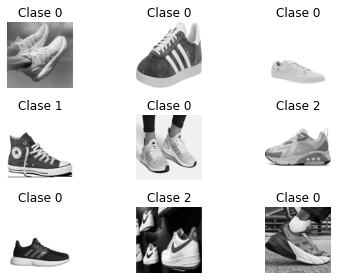

In [24]:
#Revisando algunas imagenes del dataset y corroborar informacion
fig, ax = plt.subplots(3,3)
[axi.set_axis_off() for axi in ax.ravel()]
ax = ax.flatten()
for i in ax:
  #ax[i[]].subplot(3,3,i+1)
  num = random.randint(0, len(x_train))
  i.imshow(x_train[num], cmap='gray')
  i.set_title("Clase {}".format(y_train[num]))
plt.tight_layout()
plt.show()

## <font color='blue'>**(30%) Parte 1. Mejorando su clasificador clásico.**

En aula hemos creado un clasificador de zapatos haciendo uso de diferentes tipos de features (SIFT, SURF, ORB) que son agrupadas a través del uso de un BoVW el cual genera un arreglo 1D, usada como entrada a una ANN que se encarga finalmente de la clasificación de 3 tipos de objetos.
Sin embargo el accuracy no supera el 55%. 

Utilice técnicas que usted conozca ( o investigue) que le permitan mejorar el accuracy hasta al menos un 80%. Usted puede hacer uso de cualquier técnica siempre y cuando, explique en que consiste y como logró parametrizarla para mejorar su resultado.



In [25]:
#Coloque su código aquí

# <font color='blue'>**(50%) Parte 2. Entrenando 3 arquitecturas CNN con Deep Learning**

Existen muchas arquitecturas basadas en deep Learning para crear clasificadores.
Usted deberá montar ("from scratch") y entrenar las siguientes 3 arquitecturas (para el dataset de zapatos):

LeNet

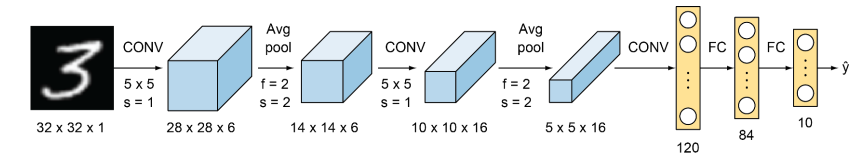

AlexNet

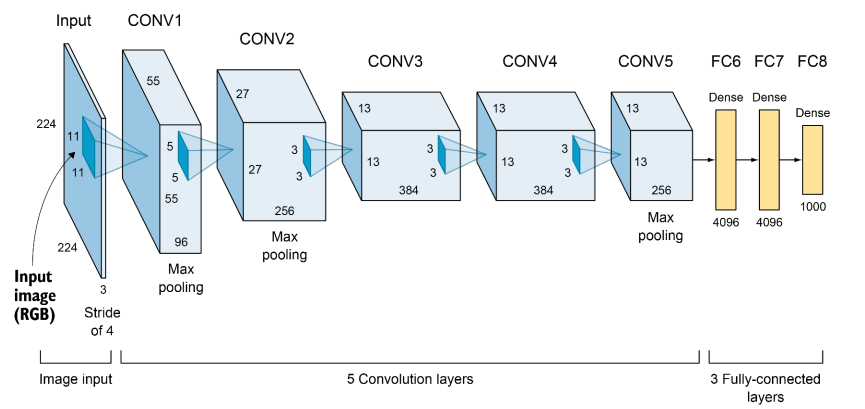

VGG16

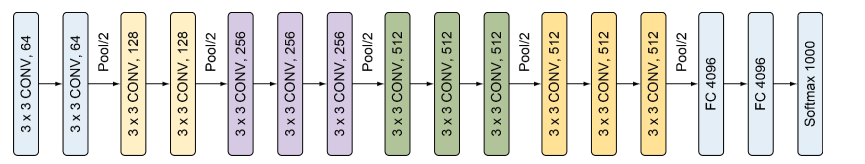

### Preparing Gray Data 

In [ ]:
x_train, y_train = load_resources('train')



leyendo categoria adidas


  0%|          | 0/237 [00:00<?, ?it/s]

leyendo categoria converse


  0%|          | 0/237 [00:00<?, ?it/s]

leyendo categoria nike


  0%|          | 0/237 [00:00<?, ?it/s]

In [ ]:
x_test, y_test= load_resources('test')


leyendo categoria adidas


  0%|          | 0/38 [00:00<?, ?it/s]

leyendo categoria converse


  0%|          | 0/38 [00:00<?, ?it/s]

leyendo categoria nike


  0%|          | 0/38 [00:00<?, ?it/s]

In [ ]:
x_test.shape

(114, 400, 400)

In [ ]:
y_test.shape

(114,)

In [ ]:
print("La dimensión de los datos para entrenamiento es: ", x_train.shape)
print("La dimensión de las etiquetas para los datos de entrenamiento es: ", y_train.shape)
print("La dimensión de los datos para validacion es: ", x_test.shape)
print("La dimensión de las etiquetas para los datos de validacion es: ", y_test.shape)

La dimensión de los datos para entrenamiento es:  (711, 400, 400)
La dimensión de las etiquetas para los datos de entrenamiento es:  (711,)
La dimensión de los datos para validacion es:  (114, 400, 400)
La dimensión de las etiquetas para los datos de validacion es:  (114,)


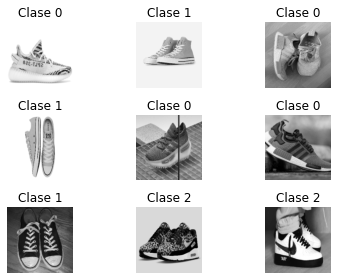

In [ ]:
#Revisando algunas imagenes del dataset y corroborar informacion
fig, ax = plt.subplots(3,3)
[axi.set_axis_off() for axi in ax.ravel()]
ax = ax.flatten()
for i in ax:
  #ax[i[]].subplot(3,3,i+1)
  num = random.randint(0, len(x_train))
  i.imshow(x_train[num], cmap='gray')
  i.set_title("Clase {}".format(y_train[num]))
plt.tight_layout()
plt.show()

In [ ]:
modelo = keras.models.Sequential()
modelo.add(keras.layers.Conv2D(10, 3,strides=(1,1), padding='valid', input_shape= (7,7,3) ) ) # Capa convolucional que poseera 10 neuronas o 10 filtros # Tamaño del filtro 3,3
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 5, 5, 10)          280       
                                                                 
Total params: 280
Trainable params: 280
Non-trainable params: 0
_________________________________________________________________


### LeNet
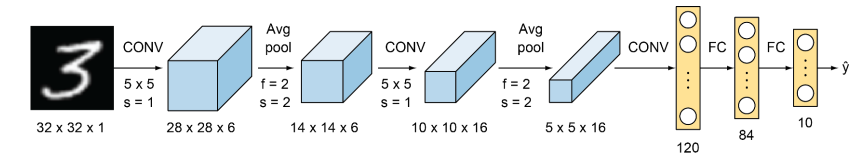

In [ ]:
#Coloque aquí su código

In [ ]:

print('conjunto de datos de entrenamiento : {0} imagenes'.format(x_train.shape))
print('conjunto de datos de entrenamiento : {0} etiquetas'.format(y_train.shape))
print('conjunto de datos de entrenamiento de test : {0} imagenes'.format(x_test.shape))
print('conjunto de datos de entrenamiento de test : {0} etiquetas'.format(y_test.shape))

conjunto de datos de entrenamiento : (711, 400, 400) imagenes
conjunto de datos de entrenamiento : (711,) etiquetas
conjunto de datos de entrenamiento de test : (114, 400, 400) imagenes
conjunto de datos de entrenamiento de test : (114,) etiquetas


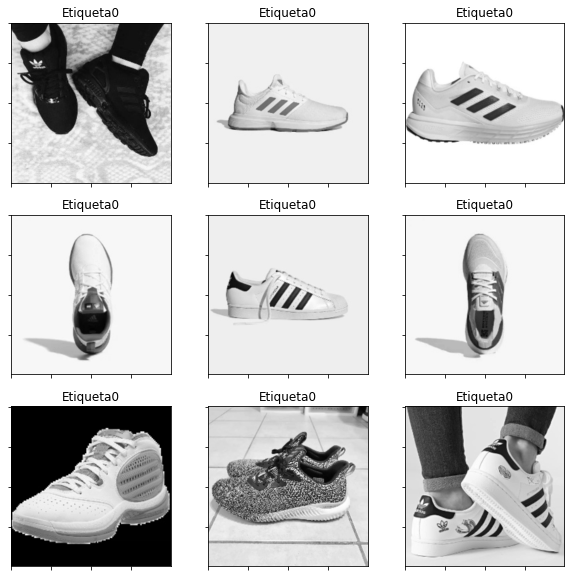

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.gca().set_yticklabels([])
  plt.gca().set_xticklabels([])
  plt.gca().set_title("Etiqueta" + str(y_train[i]))
plt.show()

In [ ]:
#x_train.shape[0] es el numero de imágenes,x_train.shape[1] == 400w x_train.shape[2] == 400h,  y la dimension adicional que sería la profundiad
x_train = x_train.reshape((x_train.shape[0],400,400,1))
x_test = x_test.reshape((x_test.shape[0],400,400,1))
print('conjunto de datos de entrenamiento : {0} imagenes'.format(x_train.shape))
print('conjunto de datos de entrenamiento de test : {0} imagenes'.format(x_test.shape))

conjunto de datos de entrenamiento : (711, 400, 400, 1) imagenes
conjunto de datos de entrenamiento de test : (114, 400, 400, 1) imagenes


Es posible que no sea necesario normalizar pero probemos.

In [ ]:
#Normalizer de datos
x_train = (x_train - x_train.min()) /( x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) /( x_test.max() - x_test.min())

In [ ]:
entrada = LK.Input(shape=(400,400,1))
conv1 = LK.Conv2D(6 ,(5,5), padding='valid', activation='relu')(entrada)
pool1 = LK.MaxPool2D((2,2), (2,2))(conv1)
conv2 = LK.Conv2D(16,(5,5), padding='same', activation='relu')(pool1)
pool2 = LK.MaxPool2D((2,2), (2,2))(conv2)
flat = LK.Flatten()(pool2)
fc1 = LK.Dense(120, activation='relu')(flat)
fc2 = LK.Dense(84, activation='relu')(fc1)
fc3 = LK.Dense(10, activation='softmax')(fc2)

modelo_ln = MK.Model(entrada, fc3)
modelo_ln.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 400, 400, 1)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 396, 396, 6)       156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 198, 198, 6)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 198, 198, 16)      2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 156816)            0     

In [ ]:
modelo_ln.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])

In [ ]:
history_ln = modelo_ln.fit(x_train, y_train,epochs=50, batch_size=50, validation_data=(x_test, y_test), verbose=True)

Epoch 1/50
15/15 [==============================] - 15s 126ms/step - loss: 4.1705 - accuracy: 0.2897 - val_loss: 1.2582 - val_accuracy: 0.3333
Epoch 2/50
15/15 [==============================] - 1s 86ms/step - loss: 1.1853 - accuracy: 0.3713 - val_loss: 1.1091 - val_accuracy: 0.3509
Epoch 3/50
15/15 [==============================] - 1s 86ms/step - loss: 1.0242 - accuracy: 0.5007 - val_loss: 1.0335 - val_accuracy: 0.4912
Epoch 4/50
15/15 [==============================] - 1s 85ms/step - loss: 0.8645 - accuracy: 0.6695 - val_loss: 1.0353 - val_accuracy: 0.4649
Epoch 5/50
15/15 [==============================] - 1s 86ms/step - loss: 0.6006 - accuracy: 0.7595 - val_loss: 1.1494 - val_accuracy: 0.5614
Epoch 6/50
15/15 [==============================] - 1s 85ms/step - loss: 0.3451 - accuracy: 0.8931 - val_loss: 1.2600 - val_accuracy: 0.5263
Epoch 7/50
15/15 [==============================] - 1s 85ms/step - loss: 0.1733 - accuracy: 0.9620 - val_loss: 1.6209 - val_accuracy: 0.5351
Epoch 8/50


### Preparing RGB Data

In [ ]:
x_train, y_train = load_resources_RGB('train')



leyendo categoria adidas


  0%|          | 0/237 [00:00<?, ?it/s]

leyendo categoria converse


  0%|          | 0/237 [00:00<?, ?it/s]

leyendo categoria nike


  0%|          | 0/237 [00:00<?, ?it/s]

In [ ]:
x_test, y_test= load_resources_RGB('test')


leyendo categoria adidas


  0%|          | 0/38 [00:00<?, ?it/s]

leyendo categoria converse


  0%|          | 0/38 [00:00<?, ?it/s]

leyendo categoria nike


  0%|          | 0/38 [00:00<?, ?it/s]

In [ ]:
x_test.shape

(114, 400, 400, 3)

In [ ]:
y_test.shape

(114,)

In [ ]:
print("La dimensión de los datos para entrenamiento es: ", x_train.shape)
print("La dimensión de las etiquetas para los datos de entrenamiento es: ", y_train.shape)
print("La dimensión de los datos para validacion es: ", x_test.shape)
print("La dimensión de las etiquetas para los datos de validacion es: ", y_test.shape)

La dimensión de los datos para entrenamiento es:  (711, 400, 400, 3)
La dimensión de las etiquetas para los datos de entrenamiento es:  (711,)
La dimensión de los datos para validacion es:  (114, 400, 400, 3)
La dimensión de las etiquetas para los datos de validacion es:  (114,)


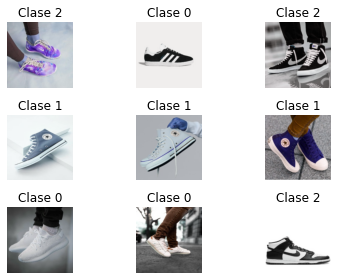

In [ ]:
#Revisando algunas imagenes del dataset y corroborar informacion
fig, ax = plt.subplots(3,3)
[axi.set_axis_off() for axi in ax.ravel()]
ax = ax.flatten()
for i in ax:
  #ax[i[]].subplot(3,3,i+1)
  num = random.randint(0, len(x_train))
  i.imshow(x_train[num], cmap='gray')
  i.set_title("Clase {}".format(y_train[num]))
plt.tight_layout()
plt.show()

### AlexNet
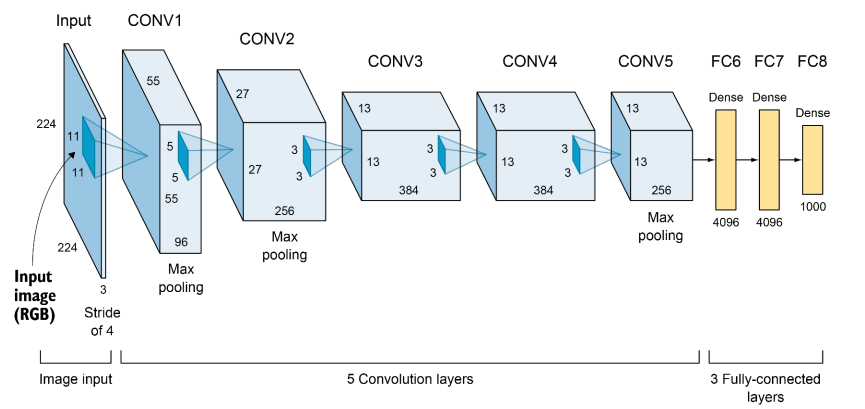

In [ ]:

print('conjunto de datos de entrenamiento : {0} imagenes'.format(x_train.shape))
print('conjunto de datos de entrenamiento : {0} etiquetas'.format(y_train.shape))
print('conjunto de datos de entrenamiento de test : {0} imagenes'.format(x_test.shape))
print('conjunto de datos de entrenamiento de test : {0} etiquetas'.format(y_test.shape))

conjunto de datos de entrenamiento : (711, 400, 400, 3) imagenes
conjunto de datos de entrenamiento : (711,) etiquetas
conjunto de datos de entrenamiento de test : (114, 400, 400, 3) imagenes
conjunto de datos de entrenamiento de test : (114,) etiquetas


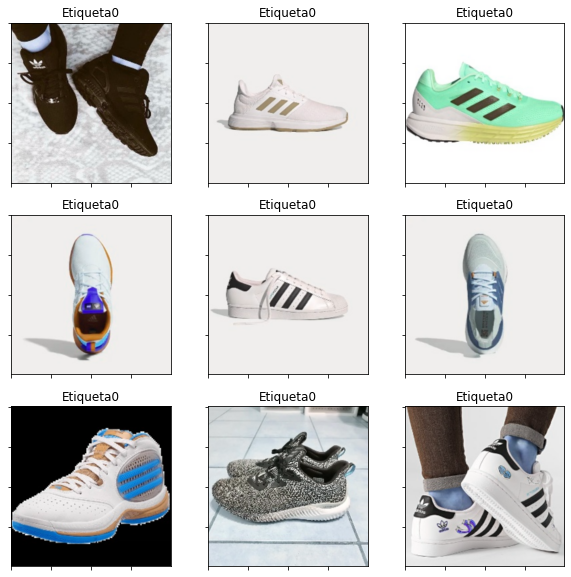

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.gca().set_yticklabels([])
  plt.gca().set_xticklabels([])
  plt.gca().set_title("Etiqueta" + str(y_train[i]))
plt.show()

In [ ]:
#x_train.shape[0] es el numero de imágenes,x_train.shape[1] == 400w x_train.shape[2] == 400h,  y la dimension adicional que sería la profundiad
x_train = x_train.reshape((x_train.shape[0],400,400,3))
x_test = x_test.reshape((x_test.shape[0],400,400,3))
print('conjunto de datos de entrenamiento : {0} imagenes'.format(x_train.shape))
print('conjunto de datos de entrenamiento de test : {0} imagenes'.format(x_test.shape))

conjunto de datos de entrenamiento : (711, 400, 400, 3) imagenes
conjunto de datos de entrenamiento de test : (114, 400, 400, 3) imagenes


Es posible que no sea necesario normalizar pero probemos.

In [ ]:
#Normalizer de datos
x_train = (x_train - x_train.min()) /( x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) /( x_test.max() - x_test.min())

In [ ]:
entrada = LK.Input(shape=(400,400,3))
conv1 = LK.Conv2D(96 ,(11,11), strides=(4,4), activation='relu')(entrada)
pool1 = LK.MaxPool2D(pool_size=(3,3), strides=(2,2))(conv1)
conv2 = LK.Conv2D(256,(5,5), padding='valid', activation='relu')(pool1)
pool2 = LK.MaxPool2D((3,3), (2,2))(conv2)
conv3 = LK.Conv2D(384,(3,3), padding='valid', activation='relu')(pool2)
conv4 = LK.Conv2D(384,(3,3), padding='valid', activation='relu')(conv3)
conv5 = LK.Conv2D(256,(3,3), padding='valid', activation='relu')(conv4)
pool3 = LK.MaxPool2D((3,3), (2,2))(conv5)
flat = LK.Flatten()(pool3)

fc1 = LK.Dense(4096, activation='relu')(flat)
drop1 = LK.Dropout(0.5)(fc1)
fc2 = LK.Dense(4096, activation='relu')(fc1)
drop2 = LK.Dropout(0.5)(fc2)
fc3 = LK.Dense(1000, activation='softmax')(drop2)

modelo_alex = MK.Model(entrada, fc3)
modelo_alex.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 98, 98, 96)        34944     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 96)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 44, 44, 256)       614656    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 21, 21, 256)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 19, 19, 384)       8851

In [ ]:
modelo_alex.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])

In [ ]:
history_alex = modelo_alex.fit(x_train, y_train,epochs=20, batch_size=50, validation_data=(x_test, y_test), verbose=True)

Epoch 1/20
15/15 [==============================] - 249s 16s/step - loss: 4.1389 - accuracy: 0.3052 - val_loss: 1.2490 - val_accuracy: 0.3333
Epoch 2/20
15/15 [==============================] - 243s 16s/step - loss: 1.2077 - accuracy: 0.3361 - val_loss: 1.1071 - val_accuracy: 0.3333
Epoch 3/20
15/15 [==============================] - 246s 16s/step - loss: 1.1553 - accuracy: 0.3263 - val_loss: 1.1117 - val_accuracy: 0.3333
Epoch 4/20
15/15 [==============================] - 245s 16s/step - loss: 1.1224 - accuracy: 0.3418 - val_loss: 1.1306 - val_accuracy: 0.3333
Epoch 5/20
15/15 [==============================] - 245s 16s/step - loss: 1.1461 - accuracy: 0.3235 - val_loss: 1.1285 - val_accuracy: 0.3333
Epoch 6/20
15/15 [==============================] - 243s 16s/step - loss: 1.1205 - accuracy: 0.3235 - val_loss: 1.1058 - val_accuracy: 0.3333
Epoch 7/20
15/15 [==============================] - 242s 16s/step - loss: 1.1243 - accuracy: 0.3277 - val_loss: 1.0999 - val_accuracy: 0.3333
Epoch 

### Preparing RGB Data

In [26]:
x_train, y_train = load_resources_RGB('train')



leyendo categoria adidas


  0%|          | 0/237 [00:00<?, ?it/s]

leyendo categoria converse


  0%|          | 0/237 [00:00<?, ?it/s]

leyendo categoria nike


  0%|          | 0/237 [00:00<?, ?it/s]

In [27]:
x_test, y_test= load_resources_RGB('test')


leyendo categoria adidas


  0%|          | 0/38 [00:00<?, ?it/s]

leyendo categoria converse


  0%|          | 0/38 [00:00<?, ?it/s]

leyendo categoria nike


  0%|          | 0/38 [00:00<?, ?it/s]

In [28]:
x_test.shape

(114, 400, 400, 3)

In [29]:
y_test.shape

(114,)

In [30]:
print("La dimensión de los datos para entrenamiento es: ", x_train.shape)
print("La dimensión de las etiquetas para los datos de entrenamiento es: ", y_train.shape)
print("La dimensión de los datos para validacion es: ", x_test.shape)
print("La dimensión de las etiquetas para los datos de validacion es: ", y_test.shape)

La dimensión de los datos para entrenamiento es:  (711, 400, 400, 3)
La dimensión de las etiquetas para los datos de entrenamiento es:  (711,)
La dimensión de los datos para validacion es:  (114, 400, 400, 3)
La dimensión de las etiquetas para los datos de validacion es:  (114,)


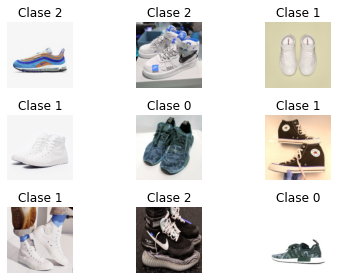

In [31]:
#Revisando algunas imagenes del dataset y corroborar informacion
fig, ax = plt.subplots(3,3)
[axi.set_axis_off() for axi in ax.ravel()]
ax = ax.flatten()
for i in ax:
  #ax[i[]].subplot(3,3,i+1)
  num = random.randint(0, len(x_train))
  i.imshow(x_train[num], cmap='gray')
  i.set_title("Clase {}".format(y_train[num]))
plt.tight_layout()
plt.show()

### VGG16
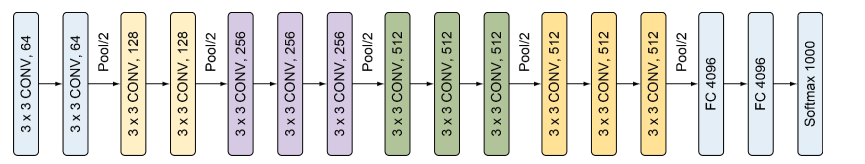

In [32]:

print('conjunto de datos de entrenamiento : {0} imagenes'.format(x_train.shape))
print('conjunto de datos de entrenamiento : {0} etiquetas'.format(y_train.shape))
print('conjunto de datos de entrenamiento de test : {0} imagenes'.format(x_test.shape))
print('conjunto de datos de entrenamiento de test : {0} etiquetas'.format(y_test.shape))

conjunto de datos de entrenamiento : (711, 400, 400, 3) imagenes
conjunto de datos de entrenamiento : (711,) etiquetas
conjunto de datos de entrenamiento de test : (114, 400, 400, 3) imagenes
conjunto de datos de entrenamiento de test : (114,) etiquetas


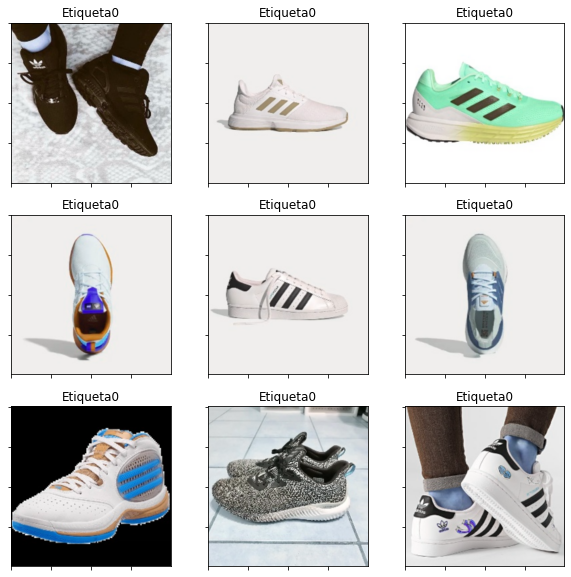

In [33]:
plt.figure(figsize=(10,10))
for i in range(9):
  
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.gca().set_yticklabels([])
  plt.gca().set_xticklabels([])
  plt.gca().set_title("Etiqueta" + str(y_train[i]))
plt.show()

In [34]:
#x_train.shape[0] es el numero de imágenes,x_train.shape[1] == 400w x_train.shape[2] == 400h,  y la dimension adicional que sería la profundiad
x_train = x_train.reshape((x_train.shape[0],400,400,3))
x_test = x_test.reshape((x_test.shape[0],400,400,3))
print('conjunto de datos de entrenamiento : {0} imagenes'.format(x_train.shape))
print('conjunto de datos de entrenamiento de test : {0} imagenes'.format(x_test.shape))

conjunto de datos de entrenamiento : (711, 400, 400, 3) imagenes
conjunto de datos de entrenamiento de test : (114, 400, 400, 3) imagenes


Es posible que no sea necesario normalizar pero probemos.

In [35]:
#Normalizer de datos
x_train = (x_train - x_train.min()) /( x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) /( x_test.max() - x_test.min())

In [41]:
entrada = LK.Input(shape=(400,400,3))
conv1 = LK.Conv2D(64 ,(3,3), padding='same', activation='relu')(entrada)
conv2 = LK.Conv2D(64 ,(3,3), padding='same', activation='relu')(conv1)
pool1 = LK.MaxPool2D(pool_size=(3,3), strides=(2,2))(conv2)
conv3 = LK.Conv2D(128 ,(3,3), padding='same', activation='relu')(pool1)
conv4 = LK.Conv2D(128 ,(3,3), padding='same', activation='relu')(conv3)
pool2 = LK.MaxPool2D(pool_size=(3,3), strides=(2,2))(conv4)
conv5 = LK.Conv2D(256 ,(3,3), padding='same', activation='relu')(pool2)
conv6 = LK.Conv2D(256 ,(3,3), padding='same', activation='relu')(conv5)
conv7 = LK.Conv2D(256 ,(3,3), padding='same', activation='relu')(conv6)
pool3 = LK.MaxPool2D(pool_size=(3,3), strides=(2,2))(conv7)
conv8 = LK.Conv2D(512 ,(3,3), padding='same', activation='relu')(pool3)
conv9 = LK.Conv2D(512 ,(3,3), padding='same', activation='relu')(conv8)
conv10 = LK.Conv2D(512 ,(3,3), padding='same', activation='relu')(conv9)
pool4 = LK.MaxPool2D(pool_size=(3,3), strides=(2,2))(conv10)
conv11 = LK.Conv2D(512 ,(3,3), padding='same', activation='relu')(pool4)
conv12 = LK.Conv2D(512 ,(3,3), padding='same', activation='relu')(conv11)
conv13 = LK.Conv2D(512 ,(3,3), padding='same', activation='relu')(conv12)
pool4 = LK.MaxPool2D(pool_size=(3,3), strides=(2,2))(conv13)


flat = LK.Flatten()(pool4)


fc1 = LK.Dense(4096, activation='relu')(flat)
fc2 = LK.Dense(4096, activation='relu')(fc1)
fc3 = LK.Dense(3, activation='softmax')(fc2)
modelo_vg = MK.Model(entrada, fc3)
modelo_vg.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 conv2d_13 (Conv2D)          (None, 400, 400, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 400, 400, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 199, 199, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 199, 199, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 199, 199, 128)     147584    
                                                           

In [42]:
modelo_vg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])

In [43]:
history_vg = modelo_vg.fit(x_train, y_train,epochs=10, batch_size=50, validation_data=(x_test, y_test), verbose=True)

Epoch 1/10


ResourceExhaustedError: ignored

## <font color='blue'>**(20%) Parte 3. Usando *Accuracy*, *Loss* y *Confusion* *Matrix* para comparar el *performance* de sus modelos**

Utilice las curvas de Loss , Accuracy y la matriz de confusión, para realizar  una tabla comparativa de los resultados obtenidos haciendo uso de los diferentes modelos previamente entrenados. Escriba al menos 3 conclusiones acerca de las técnicas aqui usadas que permitan conocer las "bondades" y los "defectos" de dichas técnicas.

In [ ]:
#Escriba su código aqui